In [1]:
import pandas as pd
import tensorflow as tf


## Loading training data

In [2]:
# parameters to import data

data_dir = "/Users/arthurdercq/code/ArthurDercq/veggideas/raw_data"
batch_size = 32
image_size = (224, 224)  # size of my images

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train_data',
    batch_size=batch_size,
    image_size=image_size,
    labels='inferred', 
    label_mode= "categorical",
    shuffle=True,
    seed=42)

Found 15000 files belonging to 15 classes.


In [38]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [5]:
class_names = train_data.class_names
print(class_names)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [31]:
len(train_data.take(1))

1

In [26]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 15)


TypeError: list indices must be integers or slices, not list

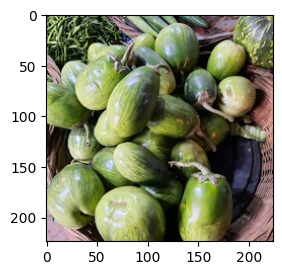

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1 )
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[[i]])
    plt.axis("off")

In [41]:
X_train = []
y_train = []

for images, labels in train_data.take(1):
    X_train.append(images.numpy().astype("uint8"))
    y_train.append(labels)

X_train = tf.concat(X_train, axis=0)
y_train = tf.concat(y_train, axis=0)

In [49]:
train_data.class_names, y_train[0]

(['Bean',
  'Bitter_Gourd',
  'Bottle_Gourd',
  'Brinjal',
  'Broccoli',
  'Cabbage',
  'Capsicum',
  'Carrot',
  'Cauliflower',
  'Cucumber',
  'Papaya',
  'Potato',
  'Pumpkin',
  'Radish',
  'Tomato'],
 <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>)

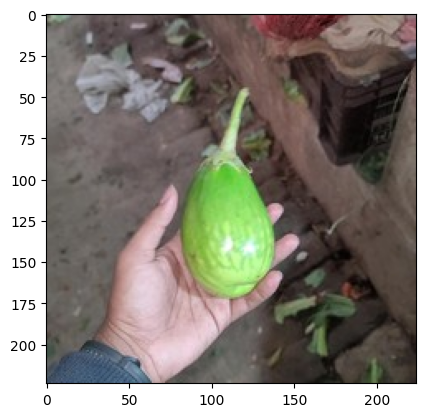

In [50]:
plt.imshow(X_train[0])

## Loading validation data

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/val_data',
    batch_size=batch_size,
    image_size=image_size,
    labels='inferred', 
    label_mode= "categorical",
    shuffle=True,
    seed=42)

Found 3000 files belonging to 15 classes.


## Loading test data

In [10]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test_data',
    batch_size=batch_size,
    image_size=image_size,
    labels='inferred', 
    label_mode= "categorical",
    shuffle=True,
    seed=42)

Found 3000 files belonging to 15 classes.
